# BernoulliZip: Efficient Compression and Decompression of Graph Sequences
##Overview
This notebook demonstrates the implementation of the BernoulliZip algorithm, which is used for compressing and decompressing graph sequences generated from Erdős-Rényi (ER) random graphs. The algorithm utilizes the Bernoulli distribution to efficiently compress sequences that represent the presence or absence of edges in a graph. The process is lossless, meaning that the original sequence can be perfectly reconstructed from the compressed data.

##Code Breakdown
1. `Bernoulli_Ordering` Function

The `Bernoulli_Ordering` function generates an "order" array that helps determine the rank of the compressed sequence. This array is crucial in ensuring that the sequence is encoded and decoded correctly. The function performs the following steps:

Input Parameters:

$n$: The length of the sequence.

$p$: The probability parameter from the Bernoulli distribution.
Computation:

The function computes an initial value $m$ which is the ceiling of $n * p$.
It then iteratively adjusts this value to generate an ordered sequence that will be used during compression.

2. `Bernoulli_Compress` Function

The `Bernoulli_Compress` function compresses the sequence generated from the graph into a binary code. The steps involved are:

Input Parameters:

`p`: The probability parameter from the Bernoulli distribution.

`seq`: The sequence representing the presence/absence of edges.

`order`: The ordering array generated by Bernoulli_Ordering.
Process:

The function calculates the rank of the sequence and generates a prefix code based on this rank.

The sequence is then encoded into a compressed binary format using combinatorial encoding.

3. `Bernoulli_Decompress`Function
The `Bernoulli_Decompress` function reverses the compression process, reconstructing the original sequence from the compressed data.

Input Parameters:

`p`: The probability parameter from the Bernoulli distribution.

`compressed`: The compressed binary sequence.

`order`: The ordering array generated by `Bernoulli_Ordering`.
`Process`: The function decodes the binary sequence back into the original sequence using the rank information.

4. Graph Generation and Sequence Extraction
The functions `generate_erdos_renyi_graph` and `generate_erdos_renyi_sequence` generate an Erdős-Rényi random graph and extract the upper triangular portion of its adjacency matrix as a sequence. This sequence represents the edges of the graph.

Input Parameters:

`n`: Number of nodes in the graph.

`p`: Probability of edge creation.

5. Graph Compression and Decompression Workflow
Generate ER Graph: The graph is generated based on the given parameters `n` and `p`.

Compression: The sequence representing the graph is compressed using `Bernoulli_Compress`.

Decompression: The compressed sequence is decompressed using `Bernoulli_Decompress`, and the original sequence is reconstructed.

Hamming Distance Calculation: The Hamming distance between the original and decompressed sequences is computed to verify lossless compression.

6. Graph Reconstruction and Statistics
The decompressed sequence is used to reconstruct the graph, and various graph statistics (such as clustering coefficient, triangle count, degree centrality, etc.) are calculated for both the original and reconstructed graphs.

Comparison: The statistics of the original and reconstructed graphs are compared to ensure that the compression process has preserved the structural properties of the graph.

7. Visualization
Finally, the original and reconstructed graphs are visualized side-by-side to provide a visual confirmation of the integrity of the compression and decompression process.

Summary
This notebook provides a complete implementation of the BernoulliZip algorithm, showcasing its application in compressing and decompressing graph sequences from Erdős-Rényi graphs. The process is validated through statistical comparisons and visual inspection of the reconstructed graph.



Original sequence: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

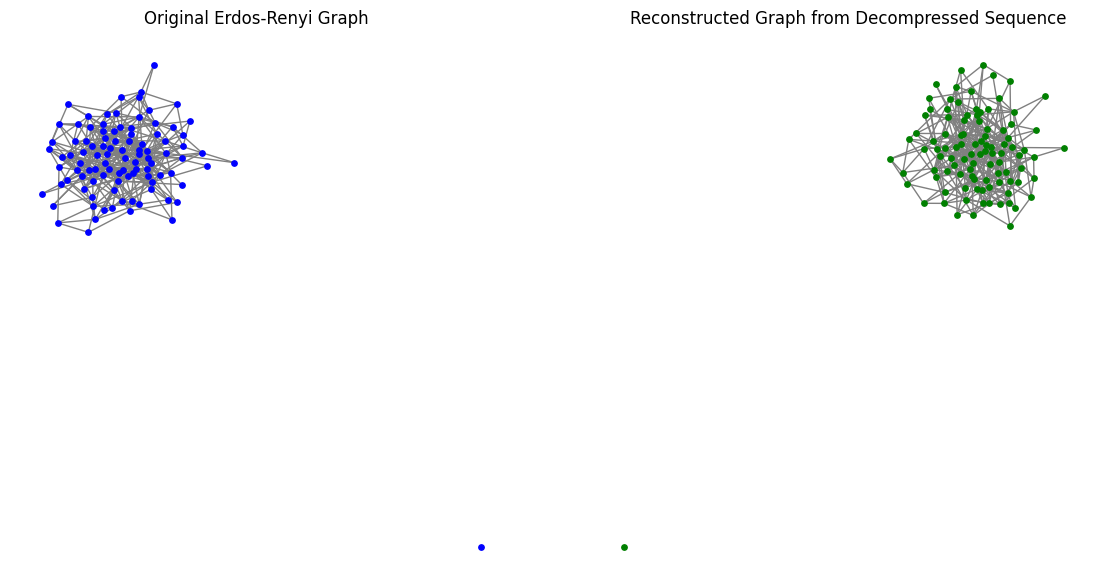

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 19 16:07:30 2024

@author: Martin Wafula
"""

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
from scipy.special import comb

def Bernoulli_Ordering(n, p):
    m = math.ceil(n * p)
    q = 1 - p

    flag0 = False
    flagn = False

    order = np.zeros(n + 1, dtype=int)
    order[0] = m

    if m == 0:
        order[1:] = np.arange(1, n + 1)
    elif m == n:
        order[1:] = np.arange(n - 1, -1, -1)
    else:
        dif = -2 * math.log(p) + 2 * math.log(q) + math.log(m * (m + 1)) - math.log((n - m) * (n - m + 1))
        u = m + 1
        d = m - 1
        for i in range(1, n + 1):
            if dif >= 0:
                if d != 0:
                    dif = dif + math.log(d) - math.log(n - (d - 1)) - 2 * math.log(p) + 2 * math.log(q)
                    order[i] = d
                    d -= 1
                else:
                    if not flag0:
                        dif = dif - math.log(n) - 2 * math.log(p) + 2 * math.log(q)
                        order[i] = d
                        flag0 = True
                    else:
                        if (u + 1) > 0 and (n - u) > 0:
                            dif = dif + math.log(u + 1) - math.log(n - u) - 2 * math.log(p) + 2 * math.log(q)
                            order[i] = u
                            u += 1
                        else:
                            break
            else:
                if u != n:
                    if (u + 1) > 0 and (n - u) > 0:
                        dif = dif + math.log(u + 1) - math.log(n - u) - 2 * math.log(p) + 2 * math.log(q)
                        order[i] = u
                        u += 1
                    else:
                        break
                else:
                    if not flagn:
                        dif = dif + math.log(n) - 2 * math.log(p) + 2 * math.log(q)
                        order[i] = u
                        flagn = True
                    else:
                        if d > 0 and (n - (d - 1)) > 0:
                            dif = dif + math.log(d) - math.log(n - (d - 1)) - 2 * math.log(p) + 2 * math.log(q)
                            order[i] = d
                            d -= 1

    return order

def Bernoulli_Compress(p, seq, order):
    n = len(seq)
    m = math.ceil((n + 1) * p - 1)
    q = 1 - p

    k = np.sum(seq)
    index = np.where(order == k)[0][0] + 1
    log_rank = math.floor(math.log2(index))
    prefix = [0] * log_rank + [1]
    dif = index - 2**log_rank
    bin_dif = list(map(int, bin(dif)[2:]))
    ldif = log_rank - len(bin_dif)
    bin_dif = [0] * ldif + bin_dif
    prefix.extend(bin_dif)

    code = 0
    for i in range(n):
        if seq[i] == 1:
            if k > n - i - 1:
                break
            code += comb(n - i - 1, k, exact=True)
            k -= 1

    code_bin = list(map(int, bin(code)[2:]))
    compressed = prefix + code_bin

    return compressed

def Bernoulli_Decompress(p, compressed, order):
    log_rank = 0
    while compressed[log_rank] == 0:
        log_rank += 1
    index = 2**log_rank
    prefix_len = log_rank + 1
    bin_dif = compressed[prefix_len:prefix_len + log_rank]

    if bin_dif:
        dif = int(''.join(map(str, bin_dif)), 2)
    else:
        dif = 0

    index += dif

    k = order[index - 1]
    seq_len = len(order) - 1
    code = compressed[prefix_len + log_rank:]
    code = int(''.join(map(str, code)), 2) if code else 0

    seq = [0] * seq_len
    for i in range(seq_len):
        if k == 0:
            break
        if code >= comb(seq_len - i - 1, k, exact=True):
            seq[i] = 1
            code -= comb(seq_len - i - 1, k, exact=True)
            k -= 1

    return seq

def generate_erdos_renyi_graph(n, p):
    return nx.erdos_renyi_graph(n, p, seed= 10000000)

def generate_erdos_renyi_sequence(n, p):
    graph = generate_erdos_renyi_graph(n, p)
    upper_triangle = nx.to_numpy_array(graph)[np.triu_indices(n, 1)]
    return upper_triangle.tolist()

def calculate_entropy(p, n):
    return n * (p * math.log2(1 / p) + (1 - p) * math.log2(1 / (1 - p)))

def hamming_distance(seq1, seq2):
    return sum(el1 != el2 for el1, el2 in zip(seq1, seq2))

def graph_statistics(graph):
    clustering_coeff = nx.average_clustering(graph)
    triangle_count = sum(nx.triangles(graph).values()) // 3
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    spectral_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

    stats = {
        'clustering_coeff': clustering_coeff,
        'triangle_count': triangle_count,
        'degree_centrality': degree_centrality,
        'betweenness_centrality': betweenness_centrality,
        'spectral_centrality': spectral_centrality
    }
    return stats

def print_statistics(name, stats):
    print(f"{name} Statistics:")
    print(f"Clustering Coefficient: {stats['clustering_coeff']}")
    print(f"Triangle Count: {stats['triangle_count']}")
    #print("Degree Centrality:", stats['degree_centrality'])
    #print("Betweenness Centrality:", stats['betweenness_centrality'])
    #print("Spectral Centrality:", stats['spectral_centrality'])
    print("\n")

# Parameters
n = 100
p = np.log2(n) / n

# Generate ER graph and sequence
original_graph = generate_erdos_renyi_graph(n, p)
original_sequence = generate_erdos_renyi_sequence(n, p)

# Compress the sequence
edge_count = n * (n - 1) // 2
order = Bernoulli_Ordering(edge_count, p)
compressed_sequence = Bernoulli_Compress(p, original_sequence, order)

# Decompress the sequence
decompressed_sequence = Bernoulli_Decompress(p, compressed_sequence, order)

# Calculate compression ratio
original_size = len(original_sequence)
compressed_size = len(compressed_sequence)
compression_ratio = original_size / compressed_size

# Verify lossless compression
assert original_sequence == decompressed_sequence, "The decompressed sequence does not match the original sequence."

# Calculate Hamming distance
hamming_dist = hamming_distance(original_sequence, decompressed_sequence)

# Reconstruct the graph from the decompressed sequence
reconstructed_graph = nx.Graph()
reconstructed_graph.add_nodes_from(range(n))
edge_index = 0
for i in range(n):
    for j in range(i + 1, n):
        if decompressed_sequence[edge_index] == 1:
            reconstructed_graph.add_edge(i, j)
        edge_index += 1

# Print results
print(f"Original sequence: {original_sequence}")
print(f"Compressed sequence: {compressed_sequence}")
print(f"Decompressed sequence: {decompressed_sequence}")
print(f"Compression ratio: {compression_ratio:.2f}")
print(f"Hamming distance: {hamming_dist}")

# Calculate and print statistics
original_stats = graph_statistics(original_graph)
reconstructed_stats = graph_statistics(reconstructed_graph)

print_statistics("Original Graph", original_stats)
print_statistics("Reconstructed Graph", reconstructed_stats)

# Plot the original and reconstructed graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

nx.draw(original_graph, ax=ax1, with_labels=False, node_color='blue', edge_color='gray', node_size=15)
ax1.set_title('Original Erdos-Renyi Graph')

nx.draw(reconstructed_graph, ax=ax2, with_labels=False, node_color='green', edge_color='gray', node_size=15)
ax2.set_title('Reconstructed Graph from Decompressed Sequence')

plt.show()